## MNISTで多クラス分類

In [46]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [47]:
# 1. データロード
from sklearn import datasets
dataset = datasets.load_digits()
images = dataset['images']
target = dataset['target']

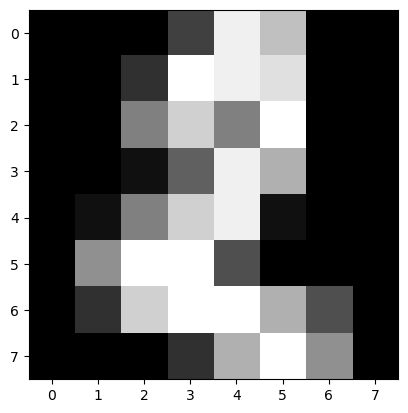

In [48]:
plt.imshow(images[2], cmap='gray')

In [49]:
target

array([0, 1, 2, ..., 8, 9, 8])

In [50]:
# 2. 前処理

# 2-1. ラベルのonehotencoding
y_true = F.one_hot(torch.tensor(target), num_classes=10)
images = torch.tensor(images, dtype=torch.float32).reshape(-1, 64)

# 2-2. 画像の標準化
images = (images - images.mean()) / images.std()

In [51]:
learning_rate = 0.03
loss_log = []

In [52]:
# 3. パラメータの初期化
W = torch.rand((10, 64), requires_grad=True)   # 出力x入力
b = torch.rand((1, 10), requires_grad=True)   # 1x出力

In [53]:
# 4. softmaxとcross_entropy
def softmax(x):
    e_x = torch.exp(x - torch.max(x, dim=1, keepdim=True)[0])
    return e_x / (torch.sum(e_x, dim=1, keepdim=True) + 1e-10)

def cross_entropy(y_true, y_pred):
    return -torch.sum(y_true * torch.log(y_pred + 1e-10)) / y_true.shape[0]

In [54]:
# 5. for文で学習ループ作成
for epoch in range(5):
    running_loss = 0
    for i in range(len(target)):
        # 6. 入力データxおよび教師ラベルのYを作成
        y_true_ = y_true[i].reshape(-1, 10)
        X = images[i].reshape(-1, 64)

        # 7. z計算
        z = X @ W.T + b

        # 8. softmaxで予測計算
        y_pred = softmax(z)

        # 9. 損失計算
        loss = cross_entropy(y_true_, y_pred)
        loss_log.append(loss.item())
        running_loss += loss.item()

        # 10. 勾配計算
        loss.backward()

        # 11. パラメータ更新
        with torch.no_grad():
            W -= learning_rate * W.grad
            b -= learning_rate + b.grad
        
        # 12. 勾配初期化
        W.grad.zero_()
        b.grad.zero_()
    
    # 13. 損失ログ出力
    print(f'epoch: {epoch+1}: {running_loss/len(target)}')

epoch: 1: 0.4271573373963795
epoch: 2: 0.143327266783357
epoch: 3: 0.11268400823225524
epoch: 4: 0.0962955492834985
epoch: 5: 0.08499547366162662


In [56]:
# 精度確認
Z  = X @ W.T + b
y_pred = softmax(Z)   # 確率値
accuracy = torch.sum(torch.argmax(y_pred, dim=-1) == torch.argmax(y_true, dim=-1)) / y_true.shape[0]
accuracy

tensor(0.9638)